In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import *

# Funzioni utili

In [57]:
def dms_to_dd(d, m, s):
    dd = d + float(m)/60 + float(s)/3600
    return dd

def minima_dev_prisma(deg, alfa):
    return np.sin(np.radians(deg + alfa)/2) / np.sin(np.radians(alfa/2))

def minima_dev_prisma_err(deg, alfa, deg_err, alfa_err):
    rad = np.radians(deg)
    alfa_rad = np.radians(alfa)
    rad_err = np.radians(deg_err)
    alfa_rad_err = np.radians(alfa_err)
    
    return (np.sqrt((np.sin(alfa_rad/2)*np.cos((alfa_rad+rad)/2)*rad_err)**2+(np.sin(rad/2)*alfa_rad_err)**2))/np.abs(np.cos(alfa_rad)-1) 

def cauchy(x, a, b):
    return a + (b) / (x**2)


# CARATTERIZZAZIONE DEL PRISMA

## Mercurio
Incertezza/scala ver = 1' \
primo angolo riflesso = 285° 11' \
secondo angolo riflesso = 166° 6' \
alfa = 60 °

In [58]:
#import data dal file PrismaAngoloMinimo

angolo_minimo_prisma = pd.read_excel("PrismaAngoloMinimo.xlsx")

deg_giallo_prisma_list = angolo_minimo_prisma["gradi giallo"]
primi_giallo_prisma_list = angolo_minimo_prisma["primi giallo"]
deg_ciano_prisma_list = angolo_minimo_prisma["gradi ciano"]
primi_ciano_prisma_list = angolo_minimo_prisma["primi ciano"]
deg_blu_prisma_list = angolo_minimo_prisma["gradi blu"]
primi_blu_prisma_list = angolo_minimo_prisma["primi blu"]
deg_viola_prisma_list = angolo_minimo_prisma["gradi viola"]
primi_viola_prisma_list = angolo_minimo_prisma["primi viola"]

#Calcolo media e errore standard media
deg_giallo_prisma = np.mean(deg_giallo_prisma_list)
primi_giallo_prisma = np.mean(primi_giallo_prisma_list)
deg_ciano_prisma = np.mean(deg_ciano_prisma_list)
primi_ciano_prisma = np.mean(primi_ciano_prisma_list)
deg_blu_prisma = np.mean(deg_blu_prisma_list)
primi_blu_prisma = np.mean(primi_blu_prisma_list)
deg_viola_prisma = np.mean(deg_viola_prisma_list)
primi_viola_prisma = np.mean(primi_viola_prisma_list)

#Calcolo le misure in gradi decimali
deg_giallo_prisma = dms_to_dd(deg_giallo_prisma, primi_giallo_prisma, 0)
deg_ciano_prisma = dms_to_dd(deg_ciano_prisma, primi_ciano_prisma, 0)
deg_blu_prisma = dms_to_dd(deg_blu_prisma, primi_blu_prisma, 0)
deg_viola_prisma = dms_to_dd(deg_viola_prisma, primi_viola_prisma, 0)

#Errore sulle misure in gradi (è dovuto solo all'errore sui primi)
err_giallo_prisma = np.std(primi_giallo_prisma_list, ddof=1)/np.sqrt(len(primi_giallo_prisma_list))
err_ciano_prisma = np.std(primi_ciano_prisma_list, ddof=1)/np.sqrt(len(primi_ciano_prisma_list))
err_blu_prisma = np.std(primi_blu_prisma_list, ddof=1)/np.sqrt(len(primi_blu_prisma_list))
err_viola_prisma = np.std(primi_viola_prisma_list, ddof=1)/np.sqrt(len(primi_viola_prisma_list))

In [59]:
#Calcolo di n per le varie lunghezze d'onda

alfa = 60

n_giallo_prisma = minima_dev_prisma(deg_giallo_prisma, alfa)
n_ciano_prisma = minima_dev_prisma(deg_ciano_prisma, alfa)
n_blu_prisma = minima_dev_prisma(deg_blu_prisma, alfa)
n_viola_prisma = minima_dev_prisma(deg_viola_prisma, alfa)

err_n_giallo_prisma = minima_dev_prisma_err(deg_giallo_prisma, alfa, err_giallo_prisma, 0)
err_n_ciano_prisma = minima_dev_prisma_err(deg_ciano_prisma, alfa, err_ciano_prisma, 0)
err_n_blu_prisma = minima_dev_prisma_err(deg_blu_prisma, alfa, err_blu_prisma, 0)
err_n_viola_prisma = minima_dev_prisma_err(deg_viola_prisma, alfa, err_viola_prisma, 0)

In [60]:
#Interpolazione di lambda e n ottenuti con la formula di Cauchy
lambda_giallo = 579.0663
lambda_ciano = 435.8328
lambda_blu = 404.6563
lambda_viola = 365.0153

lambda_ = [lambda_giallo, lambda_ciano, lambda_blu, lambda_viola]
n = [n_giallo_prisma, n_ciano_prisma, n_blu_prisma, n_viola_prisma]
err_n = [err_n_giallo_prisma, err_n_ciano_prisma, err_n_blu_prisma, err_n_viola_prisma]

pars1, vals1, ers1, *other1 = LS_fit(lambda_, n, err_n, cauchy, a = 1, b = 1)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6491 (χ²/ndof = 0.3)     │              Nfcn = 47               │
│ EDM = 6.85e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.596   │   0.009   │            │            │         │         │       │
│ 1 │ b    │   7.0e3   │   1.3e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  7.68e-05 -11.17357 │
│ b │ -11.17357  1.71e+06 │
└───┴─────────────────────┘

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\franc\AppData\Local\Temp\ipykernel_888\2977015780.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [nm]")


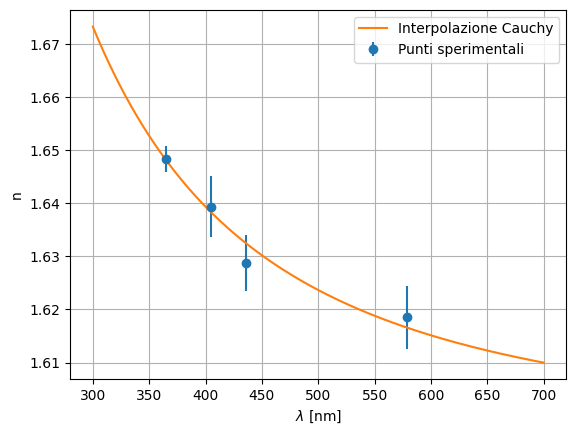

In [62]:
#Plot dei punti sperimentali e della curva interpolante
plt.errorbar(lambda_, n, yerr=err_n, fmt='o', label="Punti sperimentali")
x = np.linspace(300, 700, 1000)
y = cauchy(x, *vals1)
plt.plot(x, y, label="Interpolazione Cauchy")
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("n")
plt.legend()
plt.grid()
plt.show()

## Gas ignoto
Sottrarre angoli di 180°
dsada